In [207]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Q1_data.csv")
new_data= data[['market_cap', 'volume']]
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)


eps = 0.2
min_samples = 10

# eps = 0.25
# min_samples = 15


dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(new_data)
data['cluster'] = dbscan.labels_


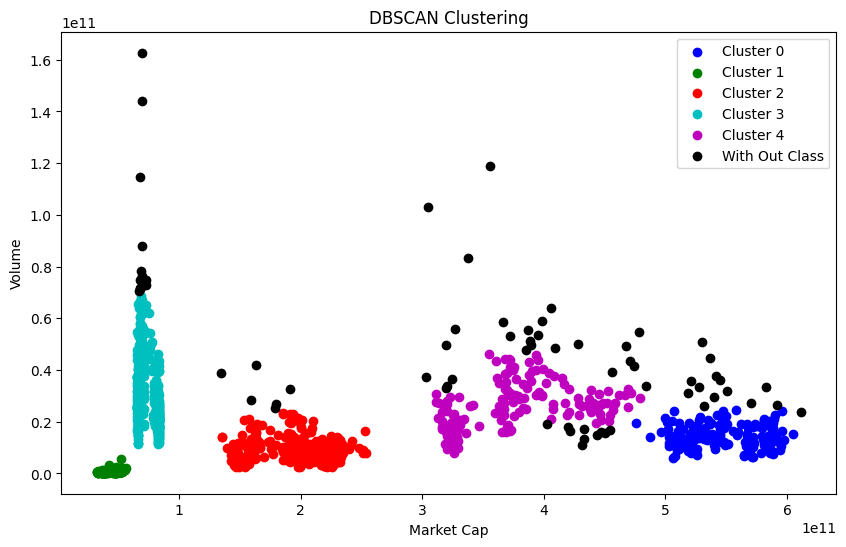

In [210]:
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']
for id in set(dbscan.labels_):
    if id == -1:
        cluster = data[data['cluster'] == id]
        plt.scatter(cluster['market_cap'], cluster['volume'], color='k', label='With Out Class')
    else:
        cluster = data[data['cluster'] == id]
        plt.scatter(cluster['market_cap'], cluster['volume'], color=colors[id % len(colors)], label=f'Cluster {id}')

plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()